<a href="https://colab.research.google.com/github/Souhib-khalbous/Drug-Response-Prediction/blob/main/DRP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt

# Load the merged dataset
merged_path = '/content/drive/MyDrive/Drug Response Prediction (DRP) Project/DRP Project/تجارب/Its_Modeling_Time/merged_dataset.csv'
data = pd.read_csv(merged_path)


In [ ]:

from sklearn.model_selection import StratifiedKFold, cross_val_predict
import seaborn as sns

# Separate features and labels
X = data.drop(columns=['(5Z)-7-OXOZEAENOL', 'cell_line_id'])
y = data['(5Z)-7-OXOZEAENOL']


In [ ]:
y.head(10)

0   -1
1    1
2   -1
3    1
4    1
5    1
6   -1
7    1
8   -1
9    1
Name: (5Z)-7-OXOZEAENOL, dtype: int64

In [ ]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=900)

# Perform 10-fold cross-validation
skf = StratifiedKFold(n_splits=10)
y_pred = cross_val_predict(model, X, y, cv=skf, method='predict')
y_prob = cross_val_predict(model, X, y, cv=skf, method='predict_proba')[:, 1]


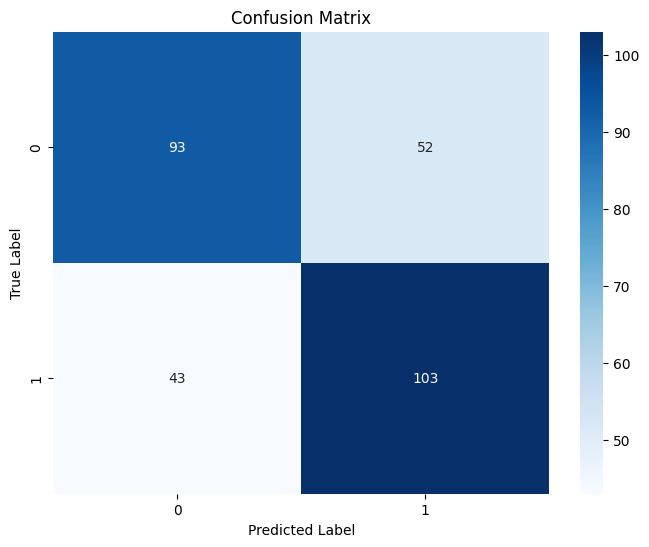

Accuracy: 0.6735395189003437
F1 Score: 0.6843853820598008
Precision: 0.6645161290322581
Recall: 0.7054794520547946
Classification Report:
              precision    recall  f1-score   support

          -1       0.68      0.64      0.66       145
           1       0.66      0.71      0.68       146

    accuracy                           0.67       291
   macro avg       0.67      0.67      0.67       291
weighted avg       0.67      0.67      0.67       291

ROC-AUC Score: 0.7545111006140764


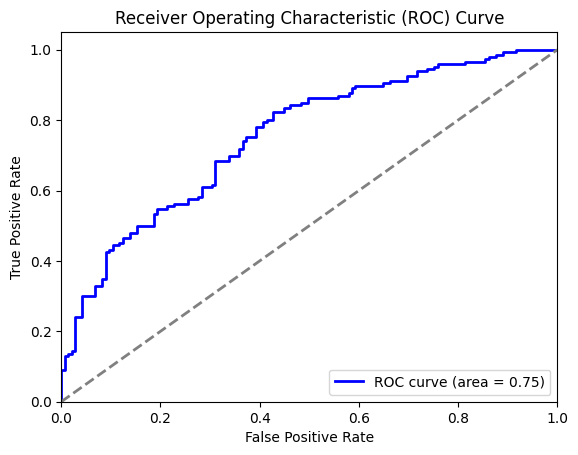

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# F1 Score
f1 = f1_score(y, y_pred)
print("F1 Score:", f1)

# Precision
precision = precision_score(y, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y, y_pred)
print("Recall:", recall)

# Classification Report
class_report = classification_report(y, y_pred)
print("Classification Report:")
print(class_report)

# ROC-AUC Score
roc_auc = roc_auc_score(y, y_prob)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#Logistic Regression

# **Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
tree_model = DecisionTreeClassifier()

# Perform 10-fold cross-validation
tree_y_pred = cross_val_predict(tree_model, X, y, cv=skf, method='predict')
tree_y_prob = cross_val_predict(tree_model, X, y, cv=skf, method='predict_proba')[:, 1]


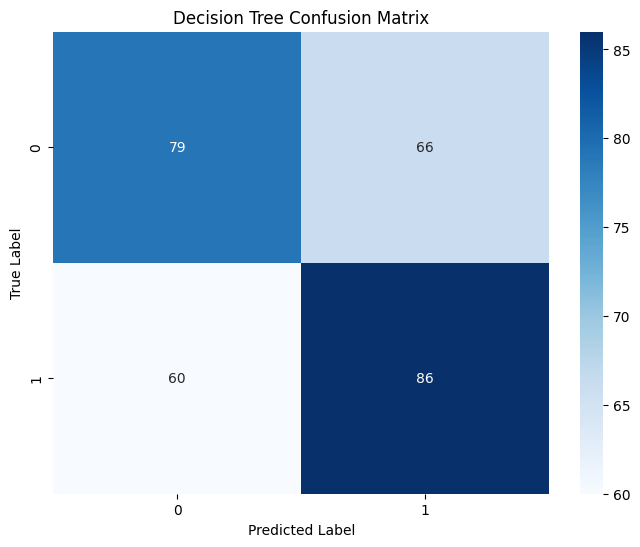

Decision Tree Accuracy: 0.5670103092783505
Decision Tree F1 Score: 0.5771812080536913
Decision Tree Precision: 0.5657894736842105
Decision Tree Recall: 0.589041095890411
Decision Tree Classification Report:
              precision    recall  f1-score   support

          -1       0.57      0.54      0.56       145
           1       0.57      0.59      0.58       146

    accuracy                           0.57       291
   macro avg       0.57      0.57      0.57       291
weighted avg       0.57      0.57      0.57       291

Decision Tree ROC-AUC Score: 0.5566131317902692


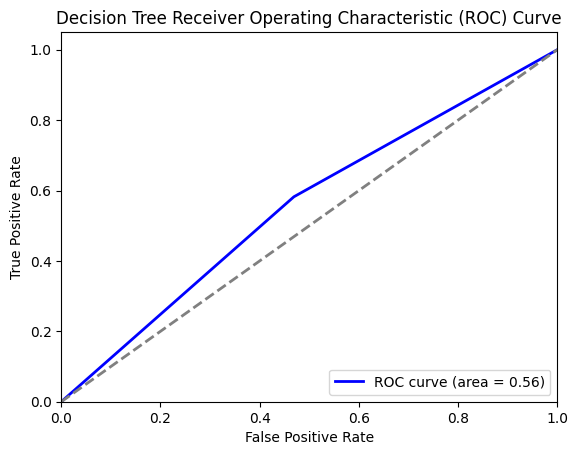

In [ ]:
# Confusion Matrix for Decision Tree
tree_conf_matrix = confusion_matrix(y, tree_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(tree_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Accuracy for Decision Tree
tree_accuracy = accuracy_score(y, tree_y_pred)
print("Decision Tree Accuracy:", tree_accuracy)

# F1 Score for Decision Tree
tree_f1 = f1_score(y, tree_y_pred)
print("Decision Tree F1 Score:", tree_f1)

# Precision for Decision Tree
tree_precision = precision_score(y, tree_y_pred)
print("Decision Tree Precision:", tree_precision)

# Recall for Decision Tree
tree_recall = recall_score(y, tree_y_pred)
print("Decision Tree Recall:", tree_recall)

# Classification Report for Decision Tree
tree_class_report = classification_report(y, tree_y_pred)
print("Decision Tree Classification Report:")
print(tree_class_report)

# ROC-AUC Score for Decision Tree
tree_roc_auc = roc_auc_score(y, tree_y_prob)
print("Decision Tree ROC-AUC Score:", tree_roc_auc)

# ROC Curve for Decision Tree
tree_fpr, tree_tpr, _ = roc_curve(y, tree_y_prob)
plt.figure()
plt.plot(tree_fpr, tree_tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % tree_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Perform 10-fold cross-validation
rf_y_pred = cross_val_predict(rf_model, X, y, cv=skf, method='predict')
rf_y_prob = cross_val_predict(rf_model, X, y, cv=skf, method='predict_proba')[:, 1]


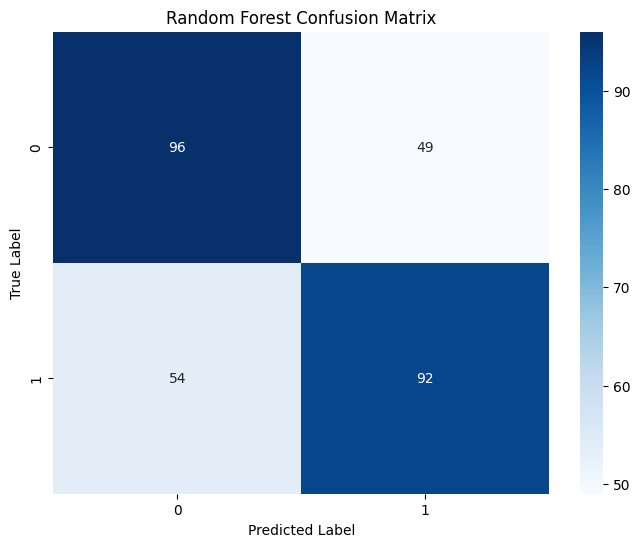

Random Forest Accuracy: 0.6460481099656358
Random Forest F1 Score: 0.6411149825783973
Random Forest Precision: 0.6524822695035462
Random Forest Recall: 0.6301369863013698
Random Forest Classification Report:
              precision    recall  f1-score   support

          -1       0.64      0.66      0.65       145
           1       0.65      0.63      0.64       146

    accuracy                           0.65       291
   macro avg       0.65      0.65      0.65       291
weighted avg       0.65      0.65      0.65       291

Random Forest ROC-AUC Score: 0.7238072744449693


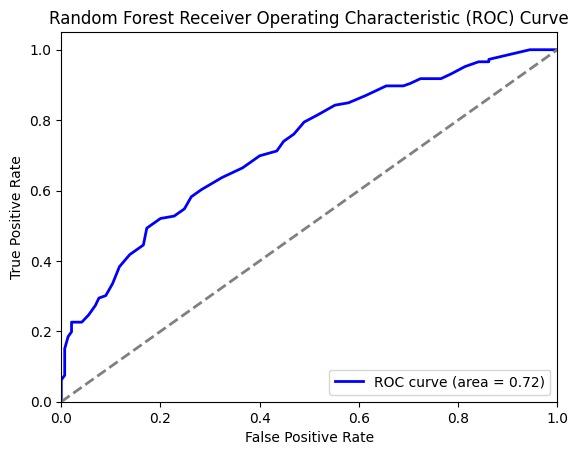

In [ ]:
# Confusion Matrix for Random Forest
rf_conf_matrix = confusion_matrix(y, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Accuracy for Random Forest
rf_accuracy = accuracy_score(y, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)

# F1 Score for Random Forest
rf_f1 = f1_score(y, rf_y_pred)
print("Random Forest F1 Score:", rf_f1)

# Precision for Random Forest
rf_precision = precision_score(y, rf_y_pred)
print("Random Forest Precision:", rf_precision)

# Recall for Random Forest
rf_recall = recall_score(y, rf_y_pred)
print("Random Forest Recall:", rf_recall)

# Classification Report for Random Forest
rf_class_report = classification_report(y, rf_y_pred)
print("Random Forest Classification Report:")
print(rf_class_report)

# ROC-AUC Score for Random Forest
rf_roc_auc = roc_auc_score(y, rf_y_prob)
print("Random Forest ROC-AUC Score:", rf_roc_auc)

# ROC Curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y, rf_y_prob)
plt.figure()
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# **SVM**

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(probability=True)

# Perform 10-fold cross-validation
svm_y_pred = cross_val_predict(svm_model, X, y, cv=skf, method='predict')
svm_y_prob = cross_val_predict(svm_model, X, y, cv=skf, method='predict_proba')[:, 1]


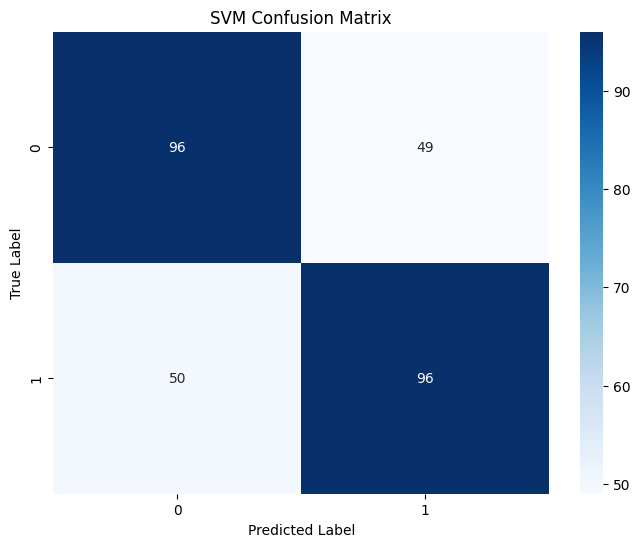

SVM Accuracy: 0.6597938144329897
SVM F1 Score: 0.6597938144329897
SVM Precision: 0.6620689655172414
SVM Recall: 0.6575342465753424
SVM Classification Report:
              precision    recall  f1-score   support

          -1       0.66      0.66      0.66       145
           1       0.66      0.66      0.66       146

    accuracy                           0.66       291
   macro avg       0.66      0.66      0.66       291
weighted avg       0.66      0.66      0.66       291

SVM ROC-AUC Score: 0.7391591875295229


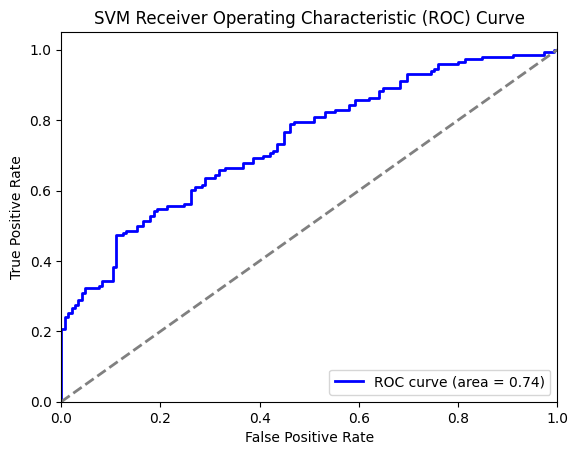

In [ ]:
# Confusion Matrix for SVM
svm_conf_matrix = confusion_matrix(y, svm_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Accuracy for SVM
svm_accuracy = accuracy_score(y, svm_y_pred)
print("SVM Accuracy:", svm_accuracy)

# F1 Score for SVM
svm_f1 = f1_score(y, svm_y_pred)
print("SVM F1 Score:", svm_f1)

# Precision for SVM
svm_precision = precision_score(y, svm_y_pred)
print("SVM Precision:", svm_precision)

# Recall for SVM
svm_recall = recall_score(y, svm_y_pred)
print("SVM Recall:", svm_recall)

# Classification Report for SVM
svm_class_report = classification_report(y, svm_y_pred)
print("SVM Classification Report:")
print(svm_class_report)

# ROC-AUC Score for SVM
svm_roc_auc = roc_auc_score(y, svm_y_prob)
print("SVM ROC-AUC Score:", svm_roc_auc)

# ROC Curve for SVM
svm_fpr, svm_tpr, _ = roc_curve(y, svm_y_prob)
plt.figure()
plt.plot(svm_fpr, svm_tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Perform 10-fold cross-validation
knn_y_pred = cross_val_predict(knn_model, X, y, cv=skf, method='predict')
knn_y_prob = cross_val_predict(knn_model, X, y, cv=skf, method='predict_proba')[:, 1]


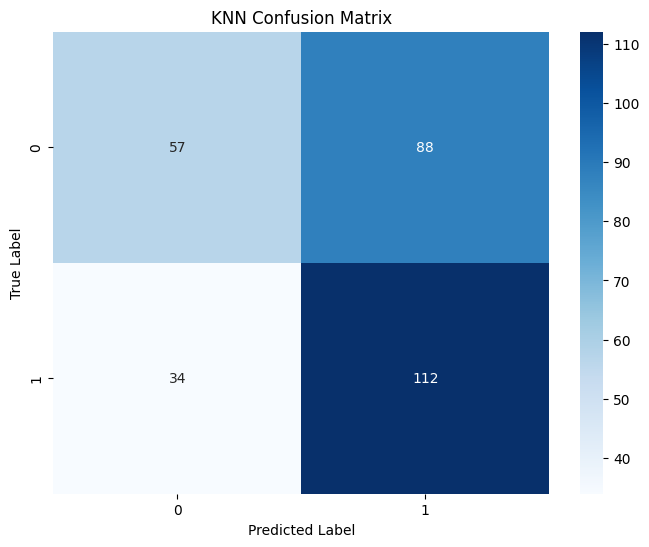

KNN Accuracy: 0.5807560137457045
KNN F1 Score: 0.6473988439306358
KNN Precision: 0.56
KNN Recall: 0.7671232876712328
KNN Classification Report:
              precision    recall  f1-score   support

          -1       0.63      0.39      0.48       145
           1       0.56      0.77      0.65       146

    accuracy                           0.58       291
   macro avg       0.59      0.58      0.57       291
weighted avg       0.59      0.58      0.57       291

KNN ROC-AUC Score: 0.6499527633443553


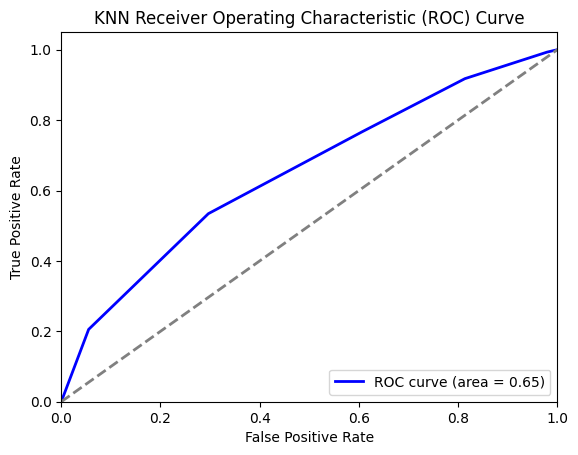

In [ ]:
# Confusion Matrix for KNN
knn_conf_matrix = confusion_matrix(y, knn_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Accuracy for KNN
knn_accuracy = accuracy_score(y, knn_y_pred)
print("KNN Accuracy:", knn_accuracy)

# F1 Score for KNN
knn_f1 = f1_score(y, knn_y_pred)
print("KNN F1 Score:", knn_f1)

# Precision for KNN
knn_precision = precision_score(y, knn_y_pred)
print("KNN Precision:", knn_precision)

# Recall for KNN
knn_recall = recall_score(y, knn_y_pred)
print("KNN Recall:", knn_recall)

# Classification Report for KNN
knn_class_report = classification_report(y, knn_y_pred)
print("KNN Classification Report:")
print(knn_class_report)

# ROC-AUC Score for KNN
knn_roc_auc = roc_auc_score(y, knn_y_prob)
print("KNN ROC-AUC Score:", knn_roc_auc)

# ROC Curve for KNN
knn_fpr, knn_tpr, _ = roc_curve(y, knn_y_prob)
plt.figure()
plt.plot(knn_fpr, knn_tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Perform 10-fold cross-validation
nb_y_pred = cross_val_predict(nb_model, X, y, cv=skf, method='predict')
nb_y_prob = cross_val_predict(nb_model, X, y, cv=skf, method='predict_proba')[:, 1]


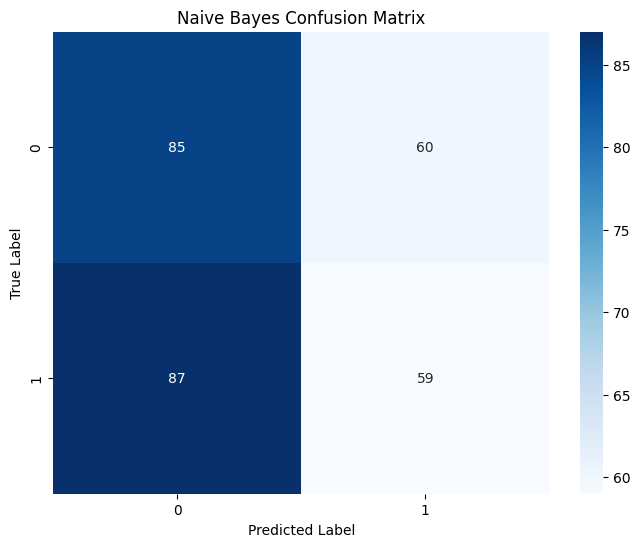

Naive Bayes Accuracy: 0.4948453608247423
Naive Bayes F1 Score: 0.44528301886792454
Naive Bayes Precision: 0.4957983193277311
Naive Bayes Recall: 0.4041095890410959
Naive Bayes Classification Report:
              precision    recall  f1-score   support

          -1       0.49      0.59      0.54       145
           1       0.50      0.40      0.45       146

    accuracy                           0.49       291
   macro avg       0.49      0.50      0.49       291
weighted avg       0.49      0.49      0.49       291

Naive Bayes ROC-AUC Score: 0.4951582427964101


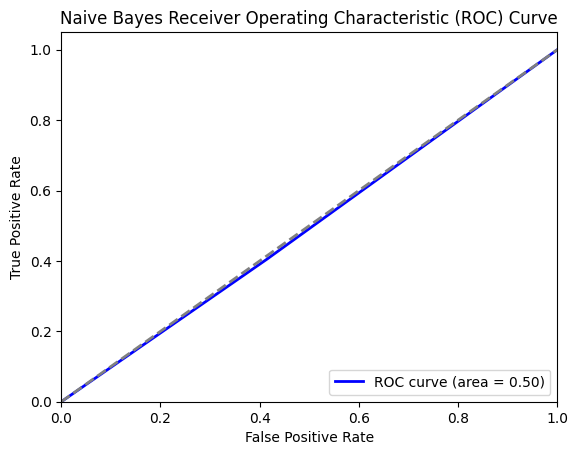

In [ ]:
# Confusion Matrix for Naive Bayes
nb_conf_matrix = confusion_matrix(y, nb_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Accuracy for Naive Bayes
nb_accuracy = accuracy_score(y, nb_y_pred)
print("Naive Bayes Accuracy:", nb_accuracy)

# F1 Score for Naive Bayes
nb_f1 = f1_score(y, nb_y_pred)
print("Naive Bayes F1 Score:", nb_f1)

# Precision for Naive Bayes
nb_precision = precision_score(y, nb_y_pred)
print("Naive Bayes Precision:", nb_precision)

# Recall for Naive Bayes
nb_recall = recall_score(y, nb_y_pred)
print("Naive Bayes Recall:", nb_recall)

# Classification Report for Naive Bayes
nb_class_report = classification_report(y, nb_y_pred)
print("Naive Bayes Classification Report:")
print(nb_class_report)

# ROC-AUC Score for Naive Bayes
nb_roc_auc = roc_auc_score(y, nb_y_prob)
print("Naive Bayes ROC-AUC Score:", nb_roc_auc)

# ROC Curve for Naive Bayes
nb_fpr, nb_tpr, _ = roc_curve(y, nb_y_prob)
plt.figure()
plt.plot(nb_fpr, nb_tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# **Neural Network (NN)**

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize the Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Perform 10-fold cross-validation
nn_y_pred = cross_val_predict(nn_model, X, y, cv=skf, method='predict')
nn_y_prob = cross_val_predict(nn_model, X, y, cv=skf, method='predict_proba')[:, 1]


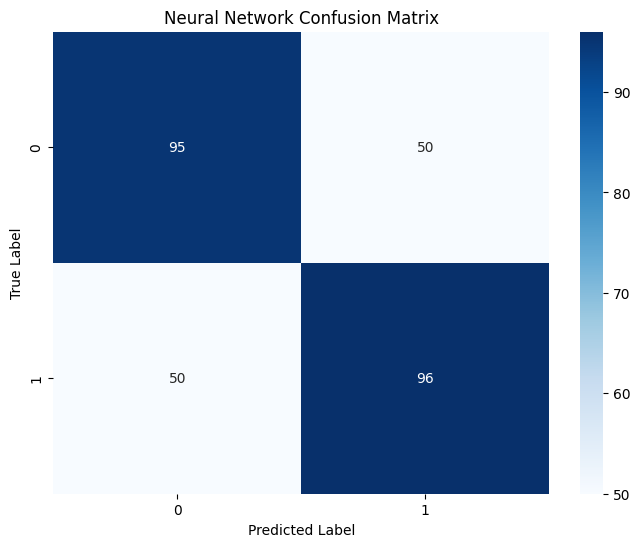

Neural Network Accuracy: 0.6563573883161512
Neural Network F1 Score: 0.6575342465753424
Neural Network Precision: 0.6575342465753424
Neural Network Recall: 0.6575342465753424
Neural Network Classification Report:
              precision    recall  f1-score   support

          -1       0.66      0.66      0.66       145
           1       0.66      0.66      0.66       146

    accuracy                           0.66       291
   macro avg       0.66      0.66      0.66       291
weighted avg       0.66      0.66      0.66       291

Neural Network ROC-AUC Score: 0.7435521965044876


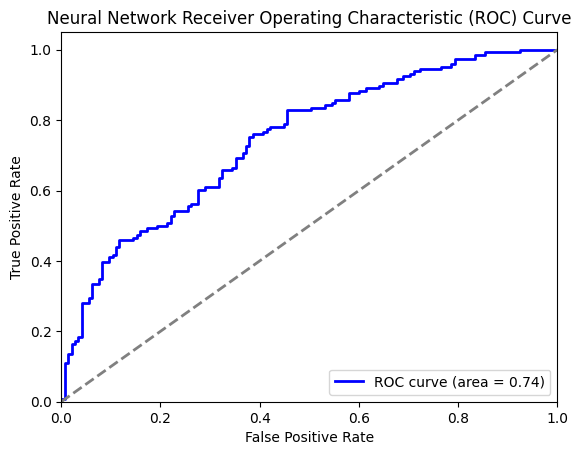

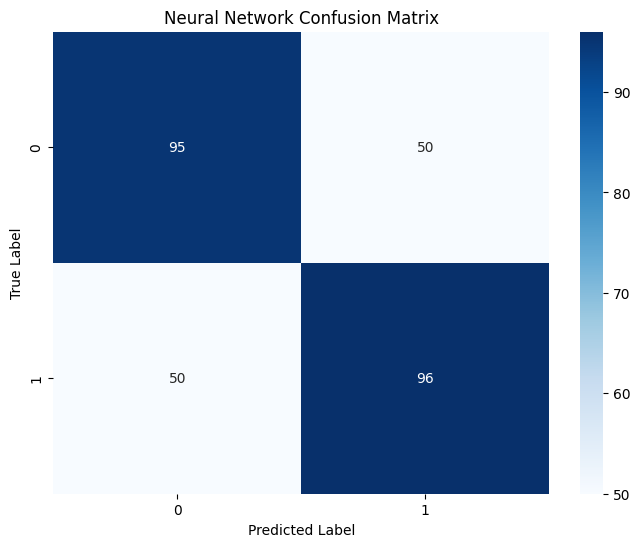

Neural Network Accuracy: 0.6563573883161512
Neural Network F1 Score: 0.6575342465753424
Neural Network Precision: 0.6575342465753424
Neural Network Recall: 0.6575342465753424
Neural Network Classification Report:
              precision    recall  f1-score   support

          -1       0.66      0.66      0.66       145
           1       0.66      0.66      0.66       146

    accuracy                           0.66       291
   macro avg       0.66      0.66      0.66       291
weighted avg       0.66      0.66      0.66       291

Neural Network ROC-AUC Score: 0.7435521965044876


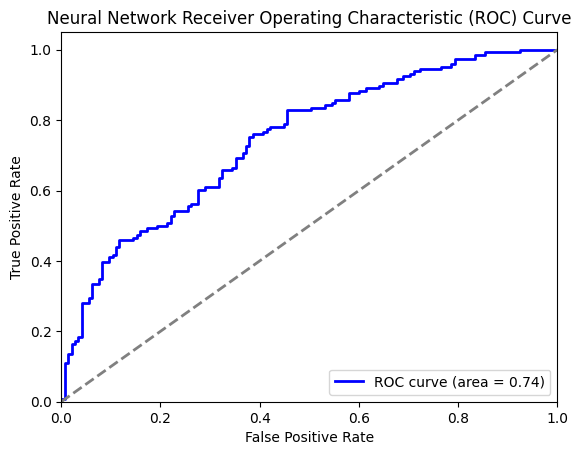

In [ ]:
# Confusion Matrix for Neural Network
nn_conf_matrix = confusion_matrix(y, nn_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(nn_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Accuracy for Neural Network
nn_accuracy = accuracy_score(y, nn_y_pred)
print("Neural Network Accuracy:", nn_accuracy)

# F1 Score for Neural Network
nn_f1 = f1_score(y, nn_y_pred)
print("Neural Network F1 Score:", nn_f1)

# Precision for Neural Network
nn_precision = precision_score(y, nn_y_pred)
print("Neural Network Precision:", nn_precision)

# Recall for Neural Network
nn_recall = recall_score(y, nn_y_pred)
print("Neural Network Recall:", nn_recall)

# Classification Report for Neural Network
nn_class_report = classification_report(y, nn_y_pred)
print("Neural Network Classification Report:")
print(nn_class_report)

# ROC-AUC Score for Neural Network
nn_roc_auc = roc_auc_score(y, nn_y_prob)
print("Neural Network ROC-AUC Score:", nn_roc_auc)

# ROC Curve for Neural Network
nn_fpr, nn_tpr, _ = roc_curve(y, nn_y_prob)
plt.figure()
plt.plot(nn_fpr, nn_tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % nn_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
